## Observations and Insights

## Dependencies and starter code

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [114]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Gather data to be grouped by the drug regimen to compare all the statistics

tumor_volume = merge_data['Tumor Volume (mm3)']
groupby_drug = merge_data.groupby(['Drug Regimen'])
drug_tumor_mean = groupby_drug['Tumor Volume (mm3)'].mean()
drug_tumor_median = groupby_drug['Tumor Volume (mm3)'].median()
drug_tumor_variance = groupby_drug['Tumor Volume (mm3)'].var()
drug_tumor_std = groupby_drug['Tumor Volume (mm3)'].std()
drug_tumor_sem = groupby_drug['Tumor Volume (mm3)'].sem()

# create and display a summary table with the stastics
summary_statistics = pd.DataFrame({'Mean': drug_tumor_mean,
                                  'Median' : drug_tumor_median,
                                  'Variance' : drug_tumor_variance,
                                  'Standard Deviation' : drug_tumor_std,
                                  'SEM' : drug_tumor_sem})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

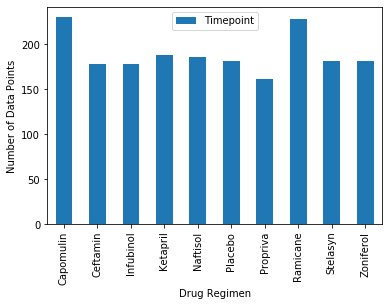

In [115]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points_per_drug = groupby_drug['Timepoint'].count()
data_points_per_drug = pd.DataFrame(data_points_per_drug)
data_points_per_drug.plot(kind='bar')
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

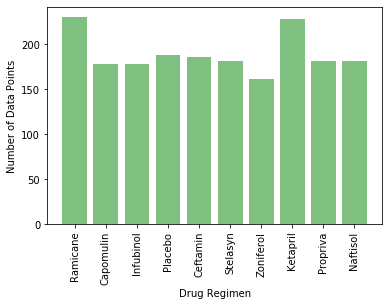

In [116]:

x_axis_bar = (merge_data['Drug Regimen']).unique()
y_axis_bar = groupby_drug['Timepoint'].count()
plt.bar(x_axis_bar, y_axis_bar, color='g', alpha=0.5, align='center')

tick_locations = [value for value in x_axis_bar]
plt.xticks(tick_locations, x_axis_bar, rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie plots

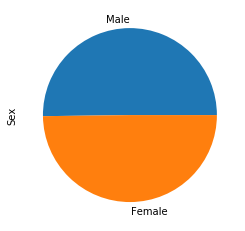

<Figure size 432x288 with 0 Axes>

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = merge_data[['Mouse ID', 'Sex']]
gender_counts = gender_counts.drop_duplicates()
gender_counts = gender_counts['Sex']

total_mice = gender_counts.count().sum()
genders = gender_counts.value_counts()

panda_gender_pie = genders.plot(kind="pie", y=(gender_counts.value_counts() / total_mice))

plt.show()
plt.tight_layout()

#need percentages added!

(-1.1016630746735625,
 1.1000791940320744,
 -1.1017685314144794,
 1.1009347297692742)

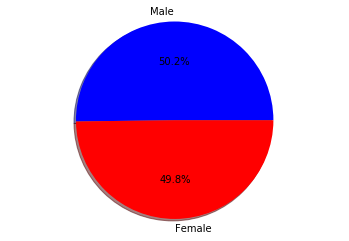

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = merge_data[['Mouse ID', 'Sex']]
gender_counts = gender_counts.drop_duplicates()
gender_counts = gender_counts['Sex']


total_mice = gender_counts.count().sum()

    
labels = gender_counts.unique()
sizes = gender_counts.value_counts() / total_mice
colors = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True)

plt.axis("equal")

## Quartiles, outliers and boxplots

In [119]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
grouped_max = merge_data.groupby(merge_data['Mouse ID'])
grouped_max = grouped_max.max()
grouped_max = grouped_max.reset_index()
grouped_max = grouped_max[['Mouse ID', "Timepoint"]]
max_df = pd.merge(grouped_max, merge_data, on=['Mouse ID','Timepoint'], how="left")

# create data frame that has only the drug regimens we are looking for
top_drugs_df = max_df.loc[(max_df["Drug Regimen"] == "Infubinol") | (max_df["Drug Regimen"] == "Capomulin") | (max_df["Drug Regimen"] == "Ceftamin") | (max_df["Drug Regimen"] == "Ramicane"), :]

# variables for each of the drugs
capomulin = top_drugs_df.loc[top_drugs_df["Drug Regimen"] == "Capomulin", :]
capomulin_tumor_data = capomulin['Tumor Volume (mm3)']

infubinol = top_drugs_df.loc[top_drugs_df["Drug Regimen"] == "Infubinol", :]
infubinol_tumor_data = infubinol['Tumor Volume (mm3)']

ceftamin = top_drugs_df.loc[top_drugs_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_tumor_data = ceftamin['Tumor Volume (mm3)']

ramicane = top_drugs_df.loc[top_drugs_df["Drug Regimen"] == "Ramicane", :]
ramicane_tumor_data = ramicane['Tumor Volume (mm3)']

# find the quartiles and iqr
quartiles = infubinol_tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#check for outliers
outlier_infubinol = infubinol.loc[(infubinol['Tumor Volume (mm3)'] < lower_bound) | (infubinol['Tumor Volume (mm3)'] > upper_bound)]

outlier_infubinol[['Mouse ID', 'Tumor Volume (mm3)']]

,Mouse ID,Tumor Volume (mm3)
31,c326,36.321346


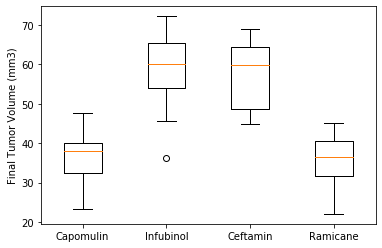

In [120]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [capomulin_tumor_data, infubinol_tumor_data, ceftamin_tumor_data, ramicane_tumor_data]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(plot_data)
plt.xticks([1, 2, 3, 4],['Capomulin', 'Infubinol', 'Ceftamin', 'Ramicane'])
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

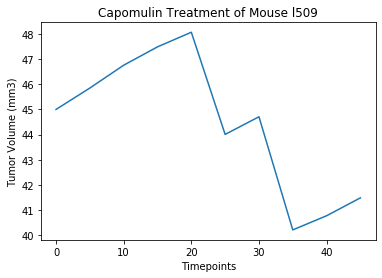

In [121]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
single_mouse_data = merge_data.loc[merge_data['Mouse ID'] == 'l509', :]

timepoints = single_mouse_data['Timepoint']
single_tumor_volume = single_mouse_data['Tumor Volume (mm3)']

plt.plot(timepoints, single_tumor_volume)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Treatment of Mouse l509')

Text(0, 0.5, 'Tumor Volume (mm3)')

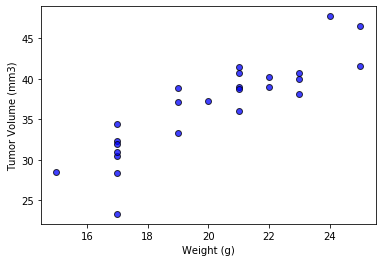

In [122]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = capomulin['Weight (g)']

plt.scatter(mouse_weight, capomulin_tumor_data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

The r-squared is: 0.8767060403658119


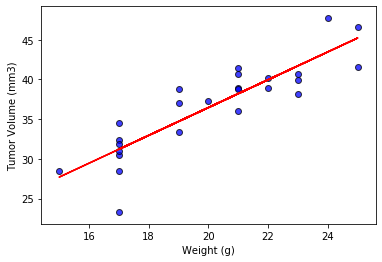

In [129]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, capomulin_tumor_data)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mouse_weight,regress_values,"r-")

plt.scatter(mouse_weight, capomulin_tumor_data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

print(f"The r-squared is: {rvalue}")